In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

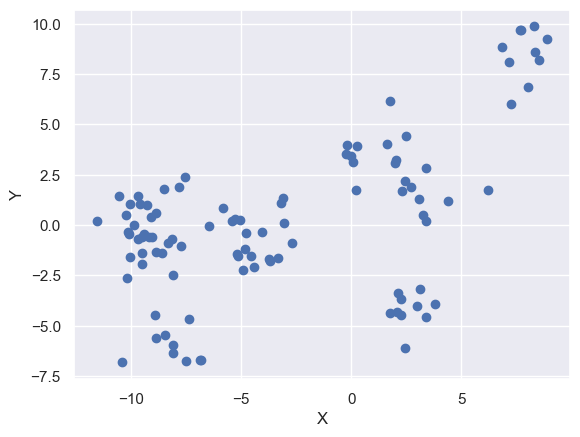

In [252]:
dataset, real_cluster = make_blobs(n_samples=100, n_features=2, centers=10, random_state=3)
dataset = pd.DataFrame(dataset, columns=['X', 'Y'])

plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<AxesSubplot: ylabel='Density'>

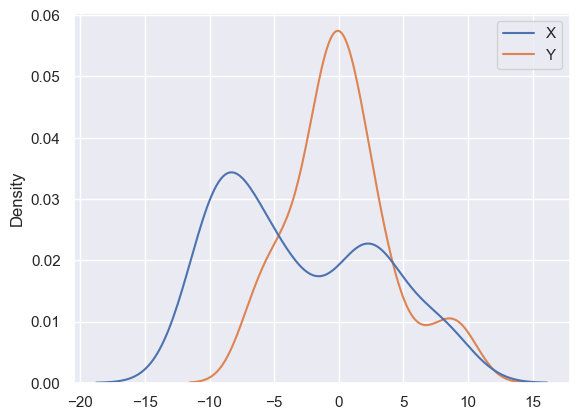

In [253]:
sns.kdeplot(dataset)

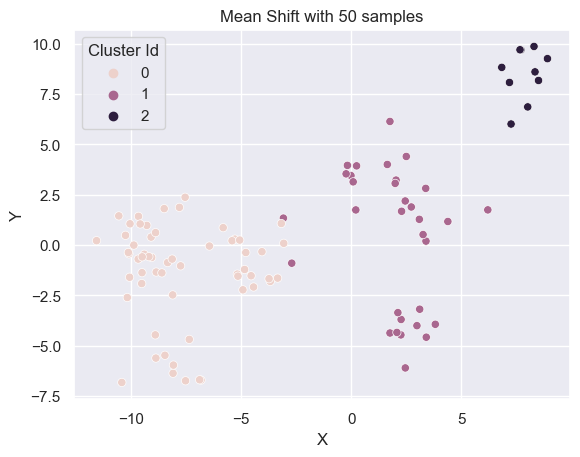

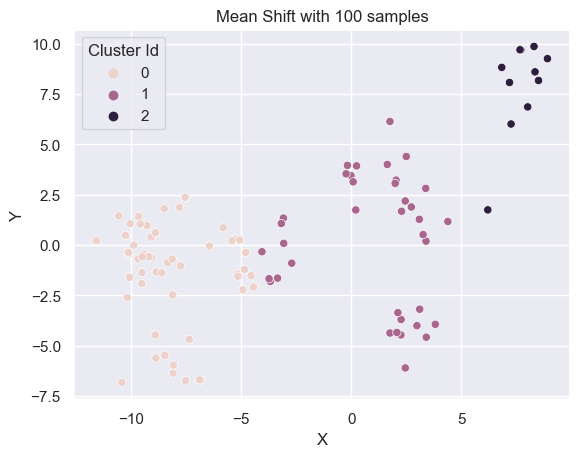

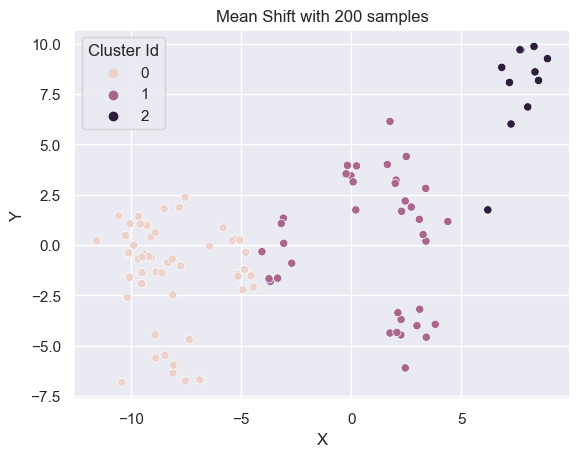

In [254]:
samples = [50, 100, 200]
for i in samples:
    bandwidth = estimate_bandwidth(dataset, n_samples=i)
    mean_shift = MeanShift(bandwidth=bandwidth)
    cluster = mean_shift.fit(dataset)

    cluster_id = pd.DataFrame(cluster.labels_, columns=['Cluster Id'])
    result = pd.concat([dataset, cluster_id], axis=1)

    sns.scatterplot(x=result.loc[:, 'X'], y=result.loc[:, 'Y'], hue=result.loc[:, 'Cluster Id'])
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()